# Grover's Algorithm

This is an implementation of [Grover's Algorithm](https://en.wikipedia.org/wiki/Grover's_algorithm) for a classical computer followed by a quantum implementation folowing [this guide](https://youtu.be/0RPFWZj7Jm0)

In [27]:
my_list = [1,5,8,6,4,3,7,0,3,5,7]

# oracle is a function that returns true if the provided input matches the desired number
def oracle(input):
  return input == 7

for i, num in enumerate(my_list):
  if oracle(num):
    print("Winner found at index {}".format(i))
    print("{} calls to oracle used".format(i+1))
    break

Winner found at index 6
7 calls to oracle used


On average the complexity of this problem is O(n) for a classical computer

In [28]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

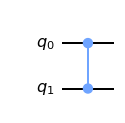

In [29]:
#define the oracle circuit
oracle = QuantumCircuit(2, name="oracle")
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output="mpl")

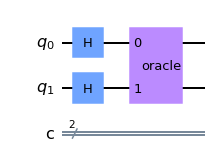

In [30]:
from qiskit.providers import aer
simulator = aer.StatevectorSimulator()
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw(output="mpl")

In [31]:
job = execute(grover_circ, simulator)
result = job.result()

In [32]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

Now that the oracle has been applied, we need to use amplitude amplification to magnify the probability of our desired state

In [33]:
# i think the reflection operator mentioned in this guide the same as a diffusion operator but not sure if there's a difference
reflection = QuantumCircuit(2, name="reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

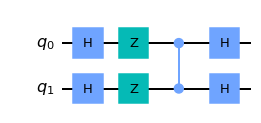

In [34]:
reflection.draw(output="mpl")

In [35]:
simulator = aer.QasmSimulator()
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
# as n increases the nubmer of times the reflection operator is applied increases
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1], [0,1])

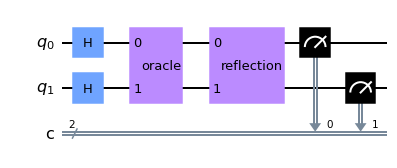

In [36]:
grover_circ.draw(output="mpl")

In [37]:
job = execute(grover_circ, simulator,shots=1)
result = job.result()
result.get_counts()

{'11': 1}

## Satisfiablility problem: [Sudoku](https://qiskit.org/textbook/ch-algorithms/grover.html#3.-Example:-3-Qubits-)

>**Note:** [Qiskit Aqua](https://github.com/Qiskit/qiskit-aqua) has been deprecated and replaced by [Qiskit Terra](https://github.com/QISKit/qiskit-terra)

The following picture shows a sudoku puzzle where the only possible numbers are 0 or 1

![](https://qiskit.org/textbook/ch-algorithms/images/binary_sudoku.png)

The following circuit will show possible solutions to this puzzle (i.e. the boxes in each row and column cannot be equal)

In [45]:
# This list shows the combinations of V elements that cannot equal each other (i.e. V_0 != V_1, etc.)
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

In [46]:
# to check these clauses computationally we need an XOR gate
def XOR(qc, a, b, output):
  qc.cx(a, output)
  qc.cx(b, output)

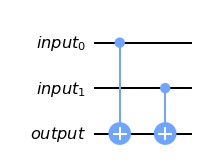

In [48]:
# We will use separate registers to name the bits
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw(output="mpl")


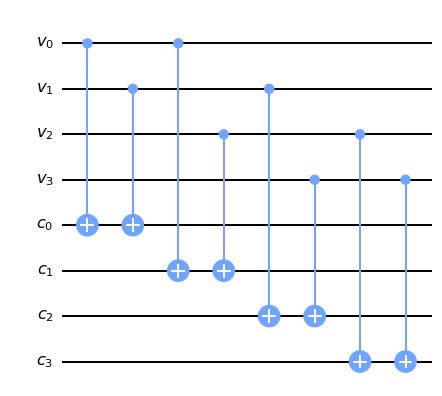

In [50]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits)

# Use XOR gate to check each clause
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw(output='mpl')
